In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

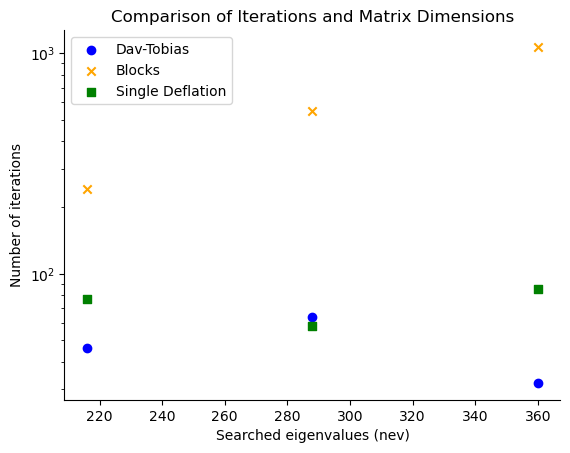

In [10]:
dav_tobias_iterations = np.array([46, 64, 32]) # with N_aux = 3*N_low
# dav_tobias_iterations = np.array([788, 106, 610])
blocs_iterations = np.array([242, 547, 1070])
modified_defl = np.array([77, 58, 85])
N = np.array([216, 288, 360])

plt.figure()
plt.ylabel('Number of iterations')
plt.xlabel('Searched eigenvalues (nev)') 
plt.scatter(N, dav_tobias_iterations,  label='Dav-Tobias', color='blue', marker='o')
plt.yscale('log')
plt.scatter(N, blocs_iterations, label='Blocks', color='orange', marker='x')
plt.scatter(N, modified_defl, label='Single Deflation', color='green', marker='s')
plt.title('Comparison of Iterations and Matrix Dimensions')
plt.legend()
sns.despine()
plt.savefig("Computation_time.png", dpi=300, bbox_inches='tight')

Blocks: slope = 120445954775.08333, intercept = -15494868870228.0, r_value = 0.9877547635375638, p_value = 0.09972932439326498, std_err = 19024273254.67249
Single Deflation: slope = 4698147721.277778, intercept = 6624748826851.333, r_value = 0.9965822095735932, p_value = 0.05264917942809505, std_err = 389430400.0765414
Dav-Tobias: slope = 143757780328.0, intercept = 27789025453180.0, r_value = 1.0, p_value = 0.0, std_err = 0.0


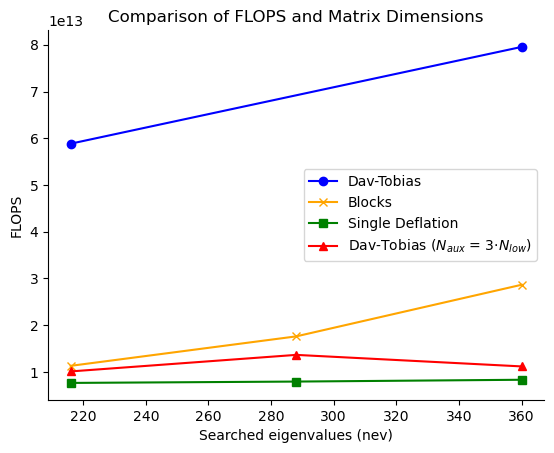

In [11]:
flops_blocks = np.array([11312281549690, 17611917727996, 28656499037302])
flops_single_defl = np.array([7655737052382, 7945438735110, 8332270324246])
flops_tobias = np.array([58840706004028, 79541826371260]) #16186594438636
flops_tobias_3 = np.array([ 10116041381116, 13654972694572, 11188249846540])

plt.figure()
plt.ylabel('FLOPS')
plt.xlabel('Searched eigenvalues (nev)')
# plt.scatter(N, flops_tobias, label='Dav-Tobias', color='blue', marker='o')
# plt.yscale('log')
plt.plot(N[[0, 2]], flops_tobias, label='Dav-Tobias', color='blue', marker='o')
plt.plot(N, flops_blocks, label='Blocks', color='orange', marker='x')
plt.plot(N, flops_single_defl, label='Single Deflation', color='green', marker='s')
plt.plot(N, flops_tobias_3, label=r'Dav-Tobias ($N_{aux}$ = 3$\cdot N_{low}$)', color='red', marker='^')
plt.title('Comparison of FLOPS and Matrix Dimensions')
plt.legend()
sns.despine()

# perform a linear fit for the FLOPS data
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(N, (flops_blocks))
print(f"Blocks: slope = {slope}, intercept = {intercept}, r_value = {r_value}, p_value = {p_value}, std_err = {std_err}")
slope, intercept, r_value, p_value, std_err = linregress(N,(flops_single_defl))
print(f"Single Deflation: slope = {slope}, intercept = {intercept}, r_value = {r_value}, p_value = {p_value}, std_err = {std_err}")
slope, intercept, r_value, p_value, std_err = linregress(N[[0, 2]], (flops_tobias))
print(f"Dav-Tobias: slope = {slope}, intercept = {intercept}, r_value = {r_value}, p_value = {p_value}, std_err = {std_err}")

plt.savefig("FLOPS.png", dpi=300, bbox_inches='tight')

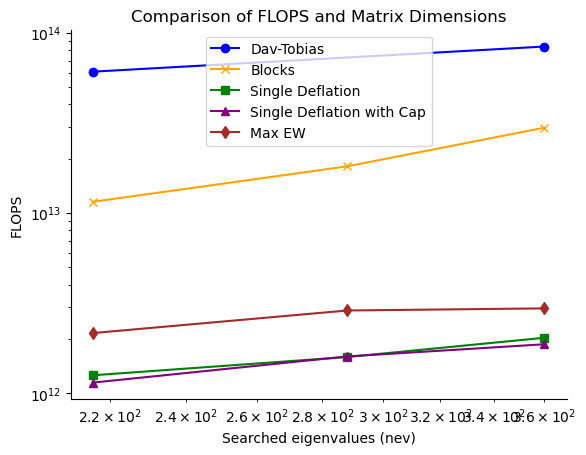

In [12]:
# improved version of the plot
flops_single = np.array([1257247883432, 1587432241315, 2029395702640])
flops_tobias = np.array([60864330787972, 16667149604812, 83886015603220])
flops_blocks = np.array([11548084964640, 18153008925903, 29725103763135])
flops_single_cap = np.array([1145215654392, 1598701663858, 1867970513573])
flops_max_EW = np.array([2156431943907, 2876132739288, 2954553921777])

plt.figure()
plt.ylabel('FLOPS')
plt.xlabel('Searched eigenvalues (nev)')
plt.plot(N[[0, 2]], flops_tobias[[0, 2]], label='Dav-Tobias', color='blue', marker='o')
plt.plot(N, flops_blocks, label='Blocks', color='orange', marker='x')
plt.plot(N, flops_single, label='Single Deflation', color='green', marker='s')
plt.plot(N, flops_single_cap, label='Single Deflation with Cap', color='purple', marker='^')
plt.plot(N, flops_max_EW, label='Max EW', color='brown', marker='d')
plt.yscale('log')
plt.xscale('log')
plt.title('Comparison of FLOPS and Matrix Dimensions')
plt.legend()
sns.despine()

### New test matrix

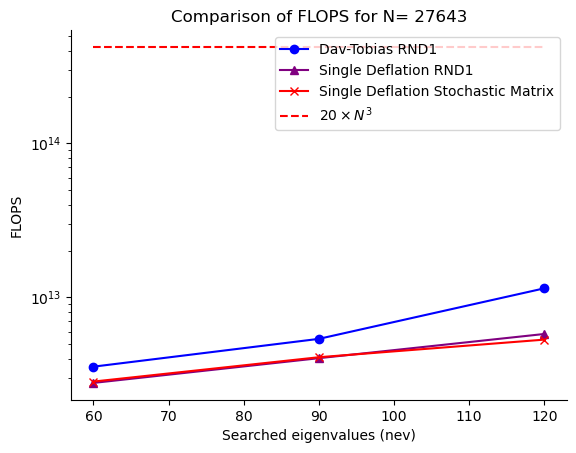

In [13]:
single_deflation_flops_HF = np.array([4222005432929, 7734659318958, 14437738854073])
Tobias_flops_HF = np.array([48211660683060, 120987475266150, 1310322289041720])
Tobias_flops_RND1 = np.array([3551245136340, 5380751464110, 11450508936840])  
single_deflation_flops_RND1 = np.array([2785446015183, 4031639513667, 5787879522575]) 
# single_deflation_flops_RND2 = np.array([2785446015183, 4031639513667, 5787879522575])  # Assuming same as RND1 for this example
single_deflation_flops_RND3 = np.array([785446015183, 4031639513667, 5787879522575])  

single_defl_stochastic_matrix = np.array([2841806322417, 4089291004179, 5320174233101])

N = np.array([60, 90, 120])
N_RND = np.array([60, 90, 120, 340])  # Assuming same N for RND as for HF

Grenze = 20*(27643)**3
plt.figure()
plt.ylabel('FLOPS')
plt.xlabel('Searched eigenvalues (nev)')
# plt.plot(N, Tobias_flops_HF, label='Dav-Tobias HF', color='orange', marker='x')
plt.plot(N, Tobias_flops_RND1, label='Dav-Tobias RND1', color='blue', marker='o')
# plt.plot(N, single_deflation_flops_HF, label='Single Deflation HF', color='green', marker='s')
plt.plot(N, single_deflation_flops_RND1, label='Single Deflation RND1', color='purple', marker='^')
plt.plot(N, single_defl_stochastic_matrix, label='Single Deflation Stochastic Matrix', color='red', marker='x')
plt.hlines(Grenze, N[0], N[-1], label=r'$20 \times N^3$', color='red', linestyle='--')
# plt.plot(N, single_deflation_flops_RND2, label='Single Deflation RND2', color='brown', marker='d')
plt.yscale('log')
# plt.xscale('log')
plt.title('Comparison of FLOPS for N= 27643')
plt.legend()
sns.despine()   
plt.savefig("FLOPS_improved.png", dpi=300, bbox_inches='tight')

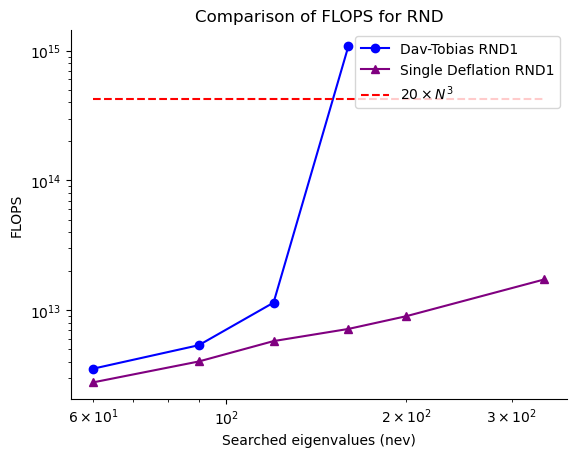

In [14]:
N_RND = np.array([60, 90, 120, 160, 200, 340])  # Assuming same N
N_tob = np.array([60, 90, 120, 160])  # Assuming same N for Tobias
single_deflation_flops_RND1 = np.array([2785446015183, 4031639513667, 5787879522575, 7180520445177, 9005348877275, 17275924077195])
dav_tobias_flops_RND1 = np.array([3551245136340, 5380751464110, 11450508936840, 1079714385493920 ])


# for RND
plt.figure()
plt.ylabel('FLOPS')
plt.xlabel('Searched eigenvalues (nev)')
plt.plot(N_tob, dav_tobias_flops_RND1, label='Dav-Tobias RND1', color='blue', marker='o')
plt.plot(N_RND, single_deflation_flops_RND1, label='Single Deflation RND1', color='purple', marker='^')
plt.hlines(Grenze, N_RND[0], N_RND[-1], label=r'$20 \times N^3$', color='red', linestyle='--')
plt.yscale('log')
plt.xscale('log')
plt.title('Comparison of FLOPS for RND')
plt.legend()
sns.despine()
plt.savefig("FLOPS_new_test.png", dpi=300, bbox_inches='tight')

# H2 System

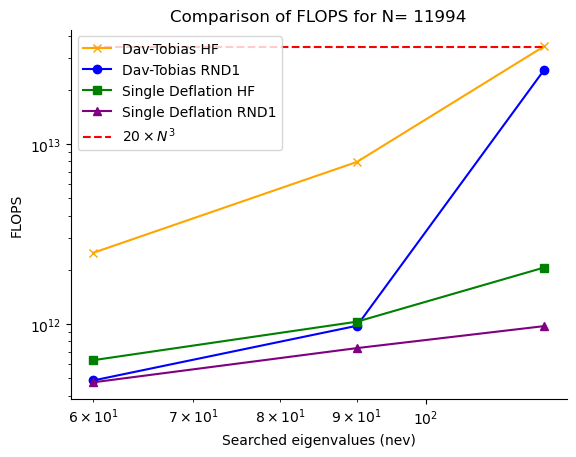

In [19]:
N = [60, 90, 120] #  120

N_flops_HF_tob = np.array([2485150391160, 7947256892220, 34849822080240])
N_flops_RND1_tob = np.array([485552855160, 977611108140, 25759887215760])

N_flops_HF_single = np.array([629437798382, 1030164288566, 2058655720842])
N_flops_RND1_single = np.array([474292196022, 734743300482, 973249665118])

Grenze = 20*(11994)**3

plt.figure()
plt.ylabel('FLOPS')
plt.xlabel('Searched eigenvalues (nev)')
plt.plot(N, N_flops_HF_tob, label='Dav-Tobias HF', color='orange', marker='x')
plt.plot(N, N_flops_RND1_tob, label='Dav-Tobias RND1', color='blue', marker='o')
plt.plot(N, N_flops_HF_single, label='Single Deflation HF', color='green', marker='s')
plt.plot(N, N_flops_RND1_single, label='Single Deflation RND1', color='purple', marker='^')
plt.hlines(Grenze, N[0], N[-1], label=r'$20 \times N^3$', color='red', linestyle='--')
plt.yscale('log')
plt.xscale('log')
plt.title('Comparison of FLOPS for N= 11994')
plt.legend()
sns.despine()
plt.savefig("FLOPS_new_test2.png", dpi=300, bbox_inches='tight')

# Check Diagonal dominance

### New Test system

In [16]:
file_HF = "diagonal_analysis_HFbasis.txt"
file_RND1 = "diagonal_analysis_RNDbasis1.txt"
file_stochastic = "analysis_stochastic_RND.txt"

def read_diagonal_analysis(file):
    with open(file, 'r') as f:
        lines = f.readlines()
    data = []
    for line in lines:
        if line.strip():  # Check if the line is not empty
            parts = line.split()
            data.append([float(part) for part in parts])
    return np.array(data)

data_HF = read_diagonal_analysis(file_HF)
data_RND1 = read_diagonal_analysis(file_RND1)
data_stochastic = read_diagonal_analysis(file_stochastic)

plt.figure()
plt.scatter(data_HF[:, 0], data_HF[:, 1], label='HF Basis', color='blue', marker='o')
plt.scatter(data_RND1[:, 0], data_RND1[:, 1], label='RND1 Basis', color='orange', marker='x')
plt.scatter(data_stochastic[:, 0], data_stochastic[:, 1], label='Stochastic Matrix', color='green', marker='s')
plt.xlabel('Absolute Value of Diagonal Elements')
plt.ylabel('Absolute Value of Off-Diagonal Elements')
plt.plot([0.00001, 100], [0.00001, 100], color='red', linestyle='--', label='threshold $|d_{ij}| = |d_{ii}|$')
plt.xscale('log')
plt.yscale('log')
plt.title('Diagonal Dominance Analysis New System')
plt.legend()
sns.despine()
plt.savefig("Diagonal_Dominance.png", dpi=300, bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: 'diagonal_analysis_HFbasis.txt'

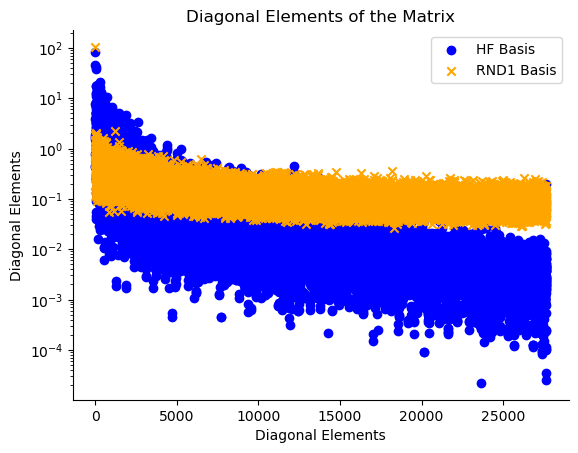

In [ ]:
# plot the value of the diagonal elements

size_data = data_HF.shape[0]
x_axis = np.linspace(0, size_data, size_data)

plt.figure()
plt.scatter(x_axis, data_HF[:, 0], label='HF Basis', color='blue', marker='o')
plt.scatter(x_axis, data_RND1[:, 0], label='RND1 Basis', color='orange', marker='x')
plt.xlabel('Diagonal Elements')
plt.ylabel('Diagonal Elements')
# plt.xscale('log')
plt.yscale('log')
plt.title('Diagonal Elements of the Matrix')
plt.legend()
sns.despine()


### Old test systems

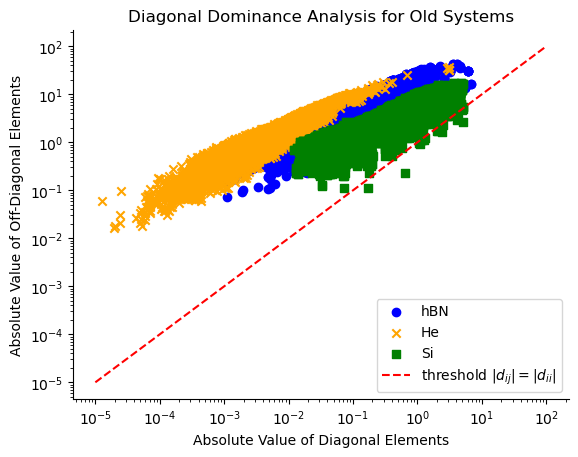

In [ ]:
hBN_data = read_diagonal_analysis("../Master_arbeit//diagonal_analysis_hBN.txt")
He_data = read_diagonal_analysis("../Master_arbeit//diagonal_analysis_He.txt")
Si_data = read_diagonal_analysis("../Master_arbeit//diagonal_analysis_Si.txt")

plt.figure()
plt.scatter(hBN_data[:, 0], hBN_data[:, 1], label='hBN', color='blue', marker='o')
plt.scatter(He_data[:, 0], He_data[:, 1], label='He', color='orange', marker='x')
plt.scatter(Si_data[:, 0], Si_data[:, 1], label='Si', color='green', marker='s')
plt.xlabel('Absolute Value of Diagonal Elements')
plt.ylabel('Absolute Value of Off-Diagonal Elements')
plt.plot([0.00001, 100], [0.00001, 100], color='red', linestyle='--', label='threshold $|d_{ij}| = |d_{ii}|$')
plt.xscale('log')
plt.yscale('log')
plt.title('Diagonal Dominance Analysis for Old Systems')
plt.legend()
sns.despine()
plt.savefig("Diagonal_Dominance_systems.png", dpi=300, bbox_inches='tight')

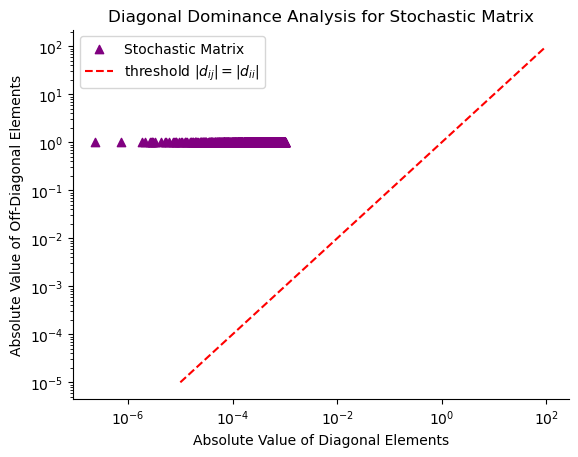

In [ ]:
# stochstic matrix data
stochstic_data = read_diagonal_analysis("stochastic_matrix.txt")

plt.figure()
plt.scatter(stochstic_data[:, 0], stochstic_data[:, 1], label='Stochastic Matrix', color='purple', marker='^')
plt.xlabel('Absolute Value of Diagonal Elements')
plt.ylabel('Absolute Value of Off-Diagonal Elements')
plt.plot([0.00001, 100], [0.00001, 100], color='red', linestyle='--', label='threshold $|d_{ij}| = |d_{ii}|$')
plt.xscale('log')
plt.yscale('log')
plt.title('Diagonal Dominance Analysis for Stochastic Matrix')
plt.legend()
sns.despine()
plt.savefig("Diagonal_Dominance_stochstic.png", dpi=300, bbox_inches='tight')